### Finance Libraries

이번 주차에서는 금융과 관련된 파이썬 라이브러리에 대해서 직접 사용해보는 시간을 가진다

#### yfinance

- yfinance는 yahoo finance의 데이터를 불러오는 파이썬 라이브러리다.
- 대부분의 미국 시장 데이터를 가져오기 편하지만, 제한적으로 미국 이외의 국가의 시장 데이터를 불러올 수도 있다.
- 시간대는 미국의 시간대에 맞춰져 있기 때문에, 한국 시장 데이터와 비교분석을 하기 위해서는 시차를 고려해야 한다.

In [1]:
import yfinance as yf

start_date = '2000-01-01'
end_date = '2024-02-27'
ticker = '^GSPC'
data = yf.download(
    ticker, start = start_date, end = end_date, interval = '1d'
)

[*********************100%%**********************]  1 of 1 completed


In [2]:
data.Close.head()

Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
Name: Close, dtype: float64

interval 속성을 다른 것으로 지정하면 추출 시기를 조정할 수도 있다

In [3]:
data_month = yf.download(
    ticker, start = start_date, end = end_date, interval = '1mo', 
)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,1469.250000,1478.000000,1350.140015,1394.459961,1394.459961,21494400000
2000-02-01,1394.459961,1444.550049,1325.069946,1366.420044,1366.420044,20912000000
2000-03-01,1366.420044,1552.869995,1346.619995,1498.579956,1498.579956,26156200000
2000-04-01,1498.579956,1527.189941,1339.400024,1452.430054,1452.430054,20106460000
2000-05-01,1452.430054,1481.510010,1361.089966,1420.599976,1420.599976,19898300000


<Axes: title={'center': 'S&P500 index'}, xlabel='Date'>

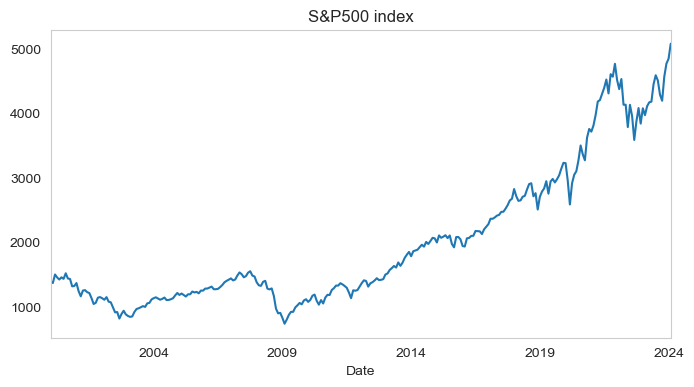

In [5]:
data_month.Close.plot(
    figsize = (8, 4),
    grid = False,
    title = 'S&P500 index'
)

`history` 함수를 사용하면 배당 선언과 액면 분할에 대한 정보 또한 불러올 수 있다

In [6]:
name = 'IBM'
ticker = yf.Ticker(name)
df = ticker.history(
    start = start_date,
    end = end_date
)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,58.617547,60.474800,58.324299,60.474800,10823694,0.0,0.0
2000-01-04 00:00:00-05:00,59.432132,59.692800,57.802962,58.422047,8606279,0.0,0.0
2000-01-05 00:00:00-05:00,58.878214,62.429807,58.454633,60.474800,13318927,0.0,0.0
2000-01-06 00:00:00-05:00,61.517457,62.006208,59.171454,59.432121,8338607,0.0,0.0
2000-01-07 00:00:00-05:00,61.126477,61.484894,57.672638,59.171474,12402108,0.0,0.0


배당만을 본다면, 다음과 같이 interval을 지정한다

In [8]:
df = ticker.history(
    start = start_date,
    end = '2024-01-01',
    interval = '3mo'
)

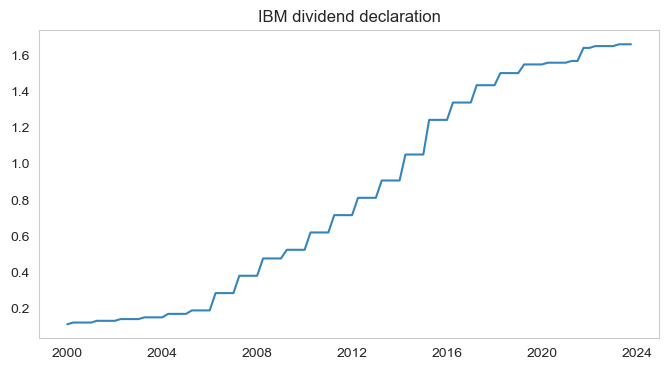

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 4))
plt.plot(
    df.index,
    df.Dividends,
    alpha = 0.9
)
plt.grid(False)
plt.title('IBM dividend declaration')
plt.show()

#### Pandas-datareader

- pandas library에서 데이터를 읽어오는 부분을 담당한다.
- yahoo에서 구할 수 없는 국내 주식 데이터를 불러올 때 사용한다.
- 주로 Naver Finance에서 자주 추출한다.
- yfinance와 다르게, end_date를 포함한 데이터까지 불러온다.
    - example : end_date가 1월 30일일 경우, yfinance는 1월 29일까지, pandas datareader는 1월 30일까지 불러온다.

`Datareader`는 웹 API로부터 데이터를 크롤링 해오는 역할을 한다

In [10]:
import pandas_datareader as pdr

ticker = '005930'
data_kor = pdr.DataReader(
    ticker, "naver", start_date, end_date
).astype(int)

In [11]:
data_kor.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000,6110,5660,6110,1483967
2000-01-05,5800,6060,5520,5580,1493604
2000-01-06,5750,5780,5580,5620,1087810
2000-01-07,5560,5670,5360,5540,806195
2000-01-10,5600,5770,5580,5770,937615


<Axes: title={'center': 'Samsung Electronics'}, xlabel='Date'>

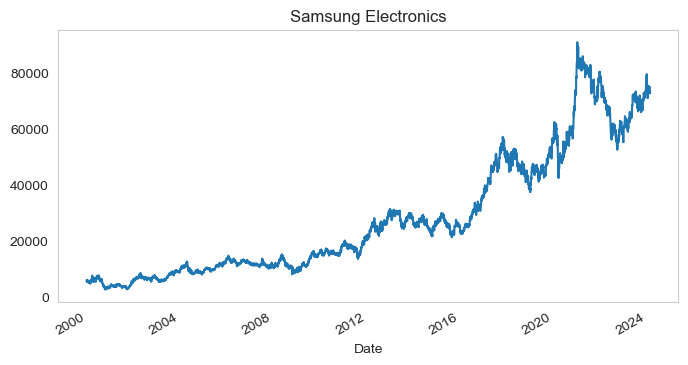

In [12]:
data_kor.Close.plot(
    figsize = (8, 4),
    grid = False,
    title = 'Samsung Electronics'
)

`get_data_fred` 함수를 사용하면 미국의 거시경제 데이터 또한 불러올 수 있다. ticker 정보는 FRED에서 열람 가능하다

In [13]:
gdp = pdr.get_data_fred('GDP', start_date, end_date)
gdp.head()

,GDP
DATE,
2000-01-01,10002.179
2000-04-01,10247.720
2000-07-01,10318.165
2000-10-01,10435.744
2001-01-01,10470.231


In [14]:
inflation = pdr.get_data_fred(['CPIAUCSL', 'CPILFESL'], start_date, end_date)
inflation.head()

,CPIAUCSL,CPILFESL
DATE,,
2000-01-01,169.3,179.3
2000-02-01,170.0,179.4
2000-03-01,171.0,180.0
2000-04-01,170.9,180.3
2000-05-01,171.2,180.7


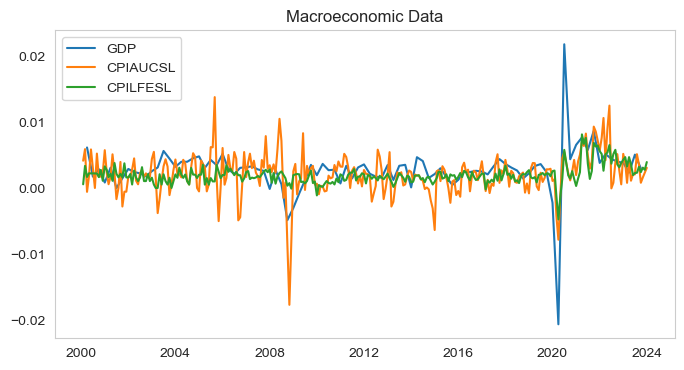

In [15]:
plt.figure(figsize = (8, 4))
plt.plot(gdp.pct_change().dropna() / 4, label = 'GDP')
plt.plot(inflation.pct_change().dropna(), label = ['CPIAUCSL','CPILFESL'])
plt.legend()
plt.grid(False)
plt.title('Macroeconomic Data')
plt.show()

#### PyKRX

- KRX 데이터를 크롤링 해오는 파이썬 라이브러리이다
- 국내 주식의 펀더멘털 정보와 채권, 인덱스 정보를 비롯한 다양한 데이터를 가져올 수 있다
- https://github.com/sharebook-kr/pykrx

In [16]:
import pykrx as px

In [17]:
etf_list = px.stock.get_etf_ticker_list()

In [18]:
import time
import tqdm
import pandas as pd

etf_data = pd.DataFrame()

for i in tqdm.tqdm(etf_list[:50]) :
    etf_data = pd.concat(
        [etf_data, px.stock.get_market_ohlcv("20230201", "20240227", i)['종가']],
        axis = 1
    )
    time.sleep(1) # time sleep, 이 과정을 생략할 경우 중간에 요청이 중단될 수 있음.
etf_data.columns = etf_list[:50]

100%|██████████| 50/50 [01:04<00:00,  1.29s/it]


In [19]:
etf_data.head()

,470320,466810,457930,445690,465780,442260,159800,472840,361580,285000,...,469580,270800,307010,319870,292050,403990,442550,442560,442570,234310
2023-11-14 00:00:00,50060.0,9045.0,9440.0,11860,100328.0,11460,25025,NaN,17710,13810,...,50805.0,11820,12530,15470,15840,11275,10460,10545,10590,13470
2023-11-15 00:00:00,50080.0,9215.0,9655.0,11930,100692.0,11695,25590,NaN,18085,14045,...,50016.0,11895,13000,15570,16075,11440,10515,10595,10650,13645
2023-11-16 00:00:00,50125.0,9105.0,9660.0,12050,100882.0,11735,25630,NaN,18070,14150,...,49992.0,12015,13040,15610,16160,11450,10440,10580,10530,13765
2023-11-17 00:00:00,50150.0,8935.0,9575.0,12000,101047.0,11665,25470,NaN,17975,13960,...,49932.0,11885,12805,15385,15990,11270,10445,10465,10515,13615
2023-11-20 00:00:00,50150.0,9220.0,9670.0,12060,101087.0,11750,25650,NaN,18110,14105,...,49757.0,12075,13175,15535,16215,11570,10470,10550,10590,13790


/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_88134/85516155.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  etf_data.pct_change().fillna(0).cumsum().plot(


<Axes: >

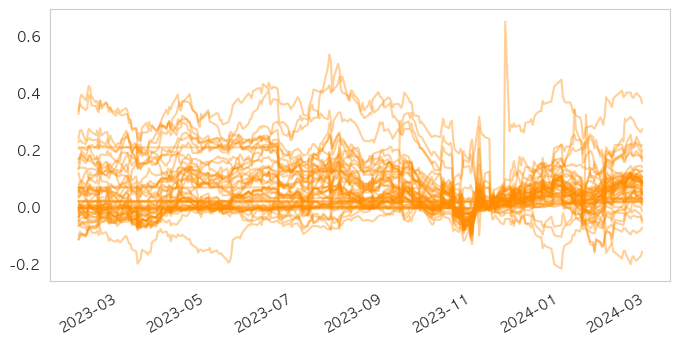

In [20]:
etf_data.pct_change().fillna(0).cumsum().plot(
    figsize = (8, 4),
    legend = False,
    grid = False,
    color = 'darkorange',
    alpha = 0.4
)

기업의 Fundamental 정보는 다음과 같이 불러올 수 있다
- BPS(Book value Per Share) : 1주당 순자산가치으로, **순자산가치 / 총 발행 보통주식의 수**로 계산 (순자산가치 = 총자산 - 총부채)
- PER(Price Earnings Ratio) : 주가수익비율. 기업의 수익이 일정하다고 가정했을 때 몇 년 만에 투자원금(시가총액)을 회수할 수 있는지 알려주는 지표. **시가총액 / 당기순이익**으로 계산.
- PBR(Price to Book Ratio) : 주가 순자산비율. **시가총액 / 순자산**으로 계산하고, 1주가 순 자산에 비해 몇배로 거래되고 있는지 보여줌으로써 주가가 기업의 실질적인 자산가치에 비해 얼마나 고평가 혹은 저평가되었는지를 나타냄.
- EPS(Earnings Per Share) : 주당순이익. 1주당 이익을 창출한 비율로 **당기순이익 / 유통주식수**로 계산.
- DIV(Dividend Yields) : 배당수익률. 주가 대비 배당금 수익률로, **주당배당금 / 주가**로 계산.
- DPS(Dividend Per Share) : 주당배당금. 주식 1주당 지급되는 배당금으로, **배당금총액 / 발행주식수**로 계산.

In [21]:
samsung_fundamental = px.stock.get_market_fundamental("20180101", "20240227", "005930")

In [22]:
samsung_fundamental.head()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-01-02,1156530,16.15,2.21,157967,1.12,28500
2018-01-03,1156530,16.34,2.23,157967,1.10,28500
2018-01-04,1156530,16.17,2.21,157967,1.12,28500
2018-01-05,1156530,16.50,2.25,157967,1.09,28500
2018-01-08,1156530,16.47,2.25,157967,1.10,28500


재무 정보를 이용해 다음과 같은 파생 지표를 구할 수 있다.

- **PBR (Price to Book Ratio)**: 주가 / 주당 순자산가치, 
- **DPR (Dividend Payout Ratio)**: DPS를 EPS로 나눈 값으로, 기업이 벌어들인 이익 중 얼마나 많은 비율을 배당으로 지급하고 있는지를 나타냄.
- **ROE (Return on Equity)**: 순이익을 자본 총계로 나눈 값으로, 기업이 자본을 얼마나 효율적으로 사용하여 이익을 창출하고 있는지를 나타냄. EPS/BPS를 통해 간접적으로 추정 가능.

In [23]:
samsung_fundamental['DPR'] = samsung_fundamental['DPS'] / samsung_fundamental['EPS']

In [24]:
samsung_fundamental['ROE'] = samsung_fundamental['EPS'] / samsung_fundamental['BPS']

In [25]:
samsung_fundamental.head()

,BPS,PER,PBR,EPS,DIV,DPS,DPR,ROE
날짜,,,,,,,,
2018-01-02,1156530,16.15,2.21,157967,1.12,28500,0.180417,0.136587
2018-01-03,1156530,16.34,2.23,157967,1.10,28500,0.180417,0.136587
2018-01-04,1156530,16.17,2.21,157967,1.12,28500,0.180417,0.136587
2018-01-05,1156530,16.50,2.25,157967,1.09,28500,0.180417,0.136587
2018-01-08,1156530,16.47,2.25,157967,1.10,28500,0.180417,0.136587


#### ta (technical analysis)
- 기술적 분석만을 위해 탄생한 라이브러리이다.
- 이동평균선, RSI, TSI, OBV 등의 지표를 생성할 수 있다.

**Bollinger Band**

- 주가의 변동에 따라 상하밴드의 폭이 같이 움직이게 하여 주가의 움직임을 밴드 내에서 판단하고자 고안된 주가지표이다.
- 하한선에 재진입시 매수, 상한선에 진입시 매도하는 전략 등의 방식으로 사용 가능하다.

In [26]:
from ta.volatility import BollingerBands
samsung_close = px.stock.get_market_ohlcv("20180101", "20240227", "005930")
samsung_close.columns = ['Open','High','Low','Close','Volume','Pct_change'] # column 이름 바꾸기

indicator_bb = BollingerBands(close = samsung_close['Close'], window = 21, window_dev = 1)

samsung_close['bb_bbm'] = indicator_bb.bollinger_mavg()
samsung_close['bb_bbh'] = indicator_bb.bollinger_hband()
samsung_close['bb_bbl'] = indicator_bb.bollinger_lband()

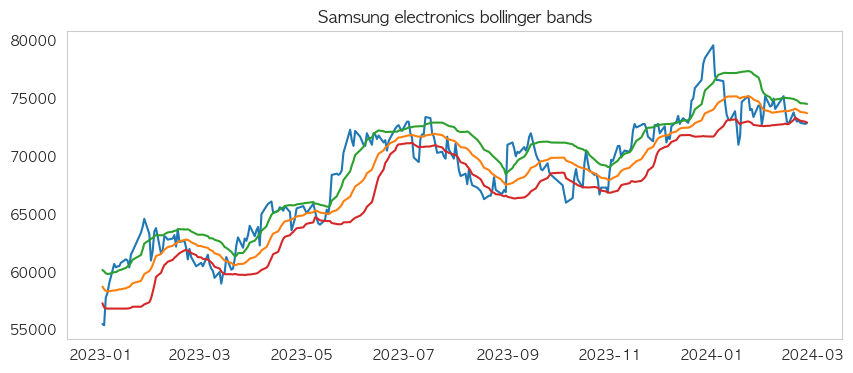

In [27]:
plt.figure(figsize = (10, 4))
plt.plot(samsung_close[['Close','bb_bbm','bb_bbh','bb_bbl']]['2023':])
plt.grid(False)
plt.title('Samsung electronics bollinger bands')
plt.show()

`mplfinance` 라이브러리를 사용하면 다음과 같이 캔들 차트로 생성할 수 있다

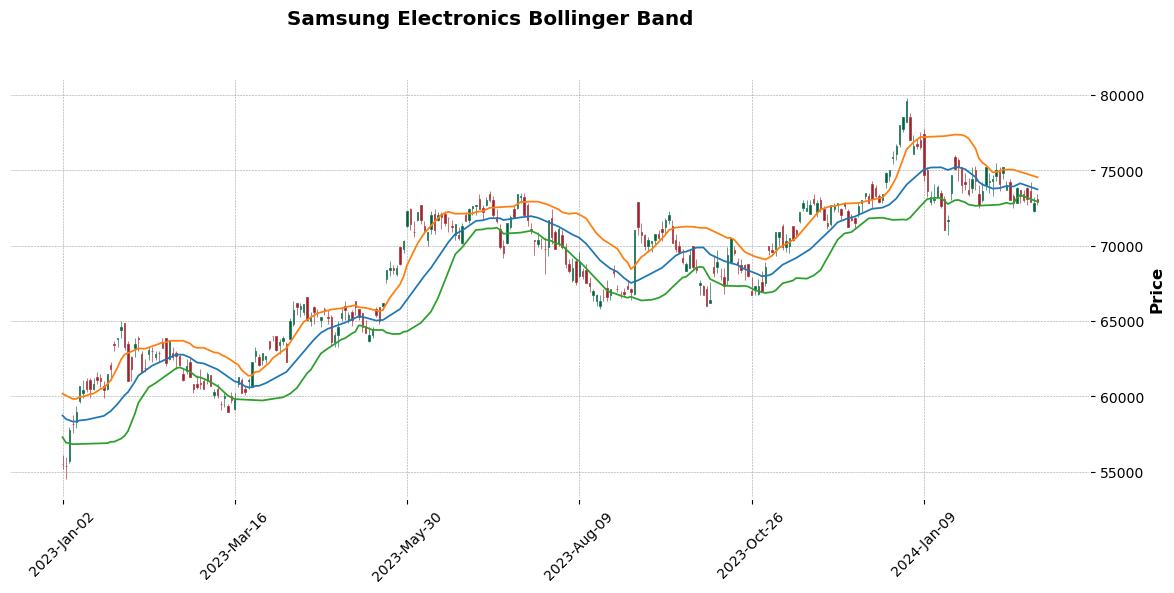

In [28]:
import warnings
import mplfinance as mpf

warnings.filterwarnings('ignore')

ap = [
    mpf.make_addplot(samsung_close[['bb_bbm','bb_bbh','bb_bbl']]['2023':])
]
mpf.plot(
    samsung_close[['Open','High','Low','Close']]['2023':], 
    type='candle', 
    style='charles', title = 'Samsung Electronics Bollinger Band', ylabel='Price', addplot = ap,
    figsize = (15, 6),  # 플롯 크기 직접 지정 (가로, 세로) in inches
)

plt.show()

**Moving Average**

- 이동평균선은 노이즈 제거 방법 중 가장 기본적인 방법이다.
- 과거의 일정 기간의 주가의 평균치로부터 구할 수 있다.
- 기술적 분석 중에서 가장 많이 사용하는 방법으로, 많은 투자가들이 애용하고 있다.

이동평균선 교차 거래 전략 : 단기 이동 평균이 장기 이동 평균 위로 돌파하면 매수, 장기 이동 평균선이 단기 이동 평균선 위로 교차하면 매도

In [29]:
from ta.trend import wma_indicator

samsung_close['ma5'] = wma_indicator(close = samsung_close['Close'], window = 5)
samsung_close['ma21'] = wma_indicator(close = samsung_close['Close'], window = 21)

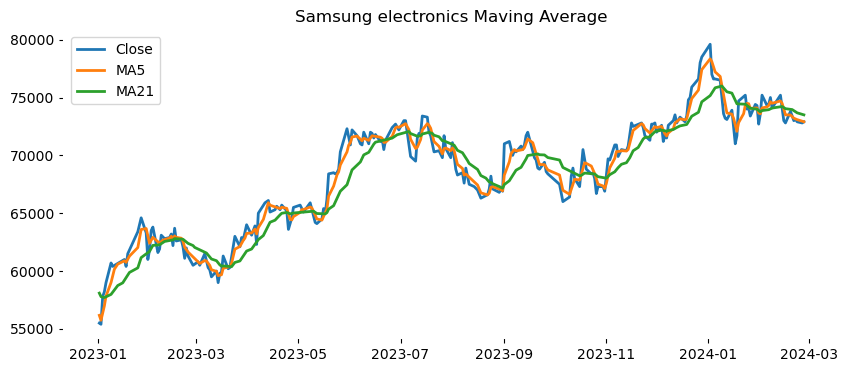

In [30]:
plt.figure(figsize = (10, 4))
plt.plot(samsung_close[['Close','ma5','ma21']]['2023':])
plt.grid(False)
plt.legend(['Close','MA5','MA21'])
plt.title('Samsung electronics Maving Average')
plt.show()

**MACD**

- 이동평균선을 또 한번 이동평균한 값으로, 이동평균수렴발산(Moving Average Convergence Divergence)의 약자이다. 
- 단기 이동평균선과 장기 이동평균선이 서로 가까워지거나(수렴) 멀어지는(발산) 원리를 이용하여 만들어졌다.
- 주가 흐름의 추세를 확인하고 추세의 강도와 지속성을 파악하는데 활용되는 대표적인 추세추종형 보조지표이다.


In [31]:
from ta.trend import macd, macd_signal

samsung_close['MACD'] = macd(samsung_close['Close'])

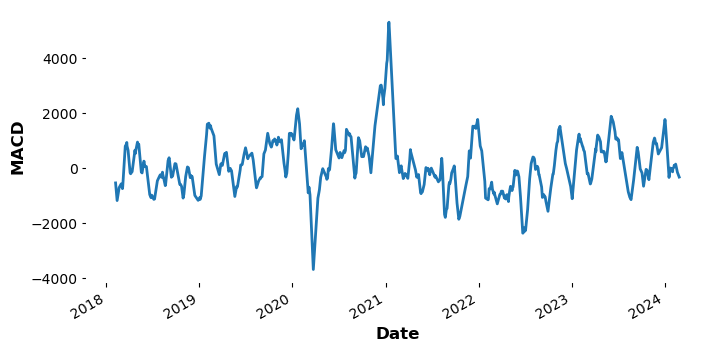

In [32]:
plt.figure(figsize = (8, 4))
samsung_close['MACD'].plot()
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

`macd_signal` 함수를 사용하면 MACD를 지수가중이동평균한 값이 계산된다.

<Axes: xlabel='Date', ylabel='MACD'>

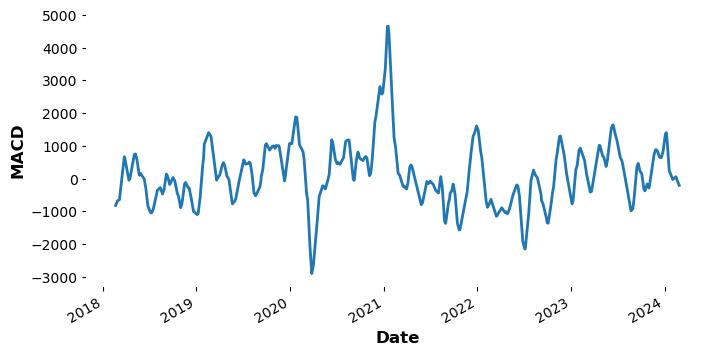

In [33]:
macd_signal(samsung_close['Close']).plot(
    figsize = (8, 4),
    grid = False,
    xlabel = 'Date',
    ylabel = 'MACD',
)

**RSI(Relative Strength Index, 상대강도지수)**

- 대표적인 모멘텀 지표 중 하나로, 주가의 평균 상승폭과 하락폭을 비교하여 가격의 상승 압력과 하락 압력 간의 상대적인 강도를 나타내는 기술적 지표이다.
- RSI가 70을 돌파하면 과매수, 30을 하회하면 과매도 구간으로 판단한다.
- 주가는 상승하고 있지만 RSI는 하강하는 식으로, RSI가 가격 변동과 역행하고 있는 상태에서 주가가 천정에 다다랐을 때는 추세가 꺾이기 쉽다.

In [34]:
from ta.momentum import rsi

samsung_close['RSI'] = rsi(close = samsung_close['Close'], window = 21)

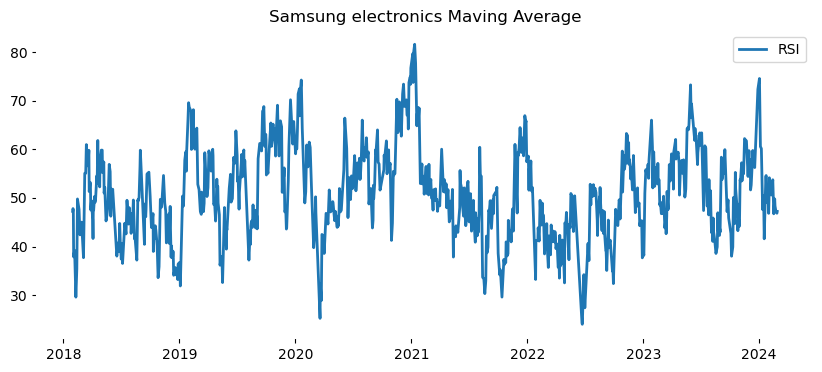

In [35]:
plt.figure(figsize = (10, 4))
plt.plot(samsung_close[['RSI']])
plt.grid(False)
plt.legend(['RSI'])
plt.title('Samsung electronics Maving Average')
plt.show()

**일목균형표**

- 주식 기술적 분석 방법의 차트 분석법 중 하나로 일본의 호소다 고이치가 개발한 주가의 움직임을 5개의 의미 있는 선을 이용하여 주가를 예측하는 기법으로 시간 개념이 포함된 지표이다.
- 종가를 바탕으로 작성되는 이동평균선과는 다르게 특정기간의 고가와 저가의 평균값을 내어 지표가 작성된다.
- 우량 종목에 사용되는 매매법으로, 거래량이 적은 종목에 적용하면 위험성이 존재한다.
- 지지선과 하한선을 기반으로 가격의 상승과 하락을 예측한다.

In [36]:
from ta.trend import IchimokuIndicator

id_ichimoku = IchimokuIndicator(
    high = samsung_close['High'], 
    low = samsung_close['Low'], 
    visual = True, 
    fillna = True
)
samsung_close['span_a'] = id_ichimoku.ichimoku_a()
samsung_close['span_b'] = id_ichimoku.ichimoku_b()
samsung_close['base_line'] = id_ichimoku.ichimoku_base_line()
samsung_close['conv_line'] = id_ichimoku.ichimoku_conversion_line()

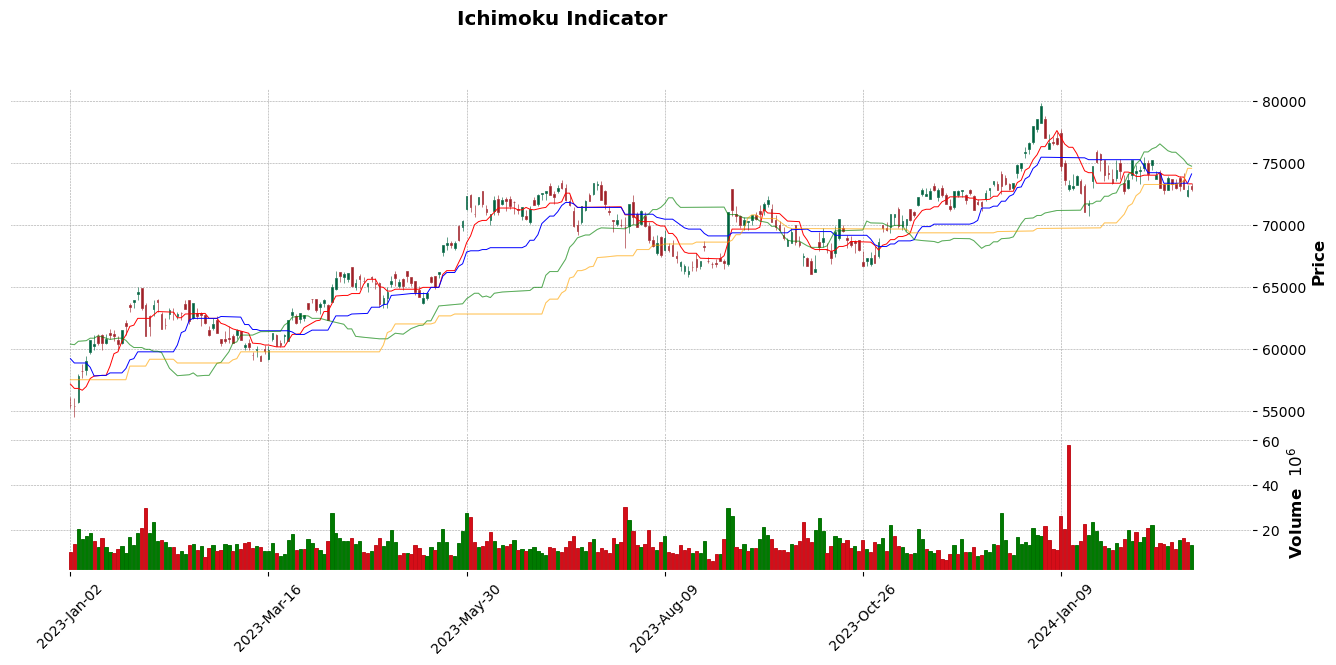

In [37]:
tenkan_sen = (samsung_close['High'].rolling(window=9).max() + samsung_close['Low'].rolling(window=9).min()) / 2
kijun_sen = (samsung_close['High'].rolling(window=26).max() + samsung_close['Low'].rolling(window=26).min()) / 2
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26) # 저항선
senkou_span_b = ((samsung_close['High'].rolling(window=52).max() + samsung_close['Low'].rolling(window=52).min()) / 2).shift(26) # 지지선

# mplfinance 플롯 생성
apds = [mpf.make_addplot(tenkan_sen['2023':], color='red', width=0.7),
        mpf.make_addplot(kijun_sen['2023':], color='blue', width=0.7),
        mpf.make_addplot(senkou_span_a['2023':], color='green', width=0.7, alpha=0.5),
        mpf.make_addplot(senkou_span_b['2023':], color='orange', width=0.7, alpha=0.5)]

apds.append(mpf.make_addplot(senkou_span_a['2023':], color='green', width=0.7, alpha=0.3, secondary_y=False))
apds.append(mpf.make_addplot(senkou_span_b['2023':], color='orange', width=0.7, alpha=0.3, secondary_y=False))

mpf.plot(
    samsung_close['2023':], 
    type='candle', 
    addplot=apds, 
    style='charles', 
    volume=True, 
    figratio=(20,8), 
    figscale=1.2,
    title = 'Ichimoku Indicator'
)

#### Example.

주가가 상승 혹은 하락하는 Logit 모형을 만들어 보자. 여기서 Logit Model은 종속변수가 가변수인 계량경제학 모형 중 하나이다.

In [78]:
start_date = '2005-01-01'
end_date = '2024-02-28'

ticker = '005930'
data = pdr.DataReader(
    ticker,
    'naver',
    start = start_date,
    end = end_date,
).astype(int)

통계 모형 설계를 위해서 안정적 데이터로 만들기 위해 차분을 진행한다

In [79]:
import numpy as np
ret = np.log(data.Close / data.Close.shift(1)).dropna()

기술적 분석을 위해 ta 라이브러리로부터 다음과 같은 변수들을 추가한다

In [80]:
from ta.volatility import BollingerBands
from ta.volume import money_flow_index, on_balance_volume
from ta.momentum import rsi
from ta.volume import volume_weighted_average_price
from ta.momentum import tsi
from ta.volume import ease_of_movement
from ta.volume import volume_price_trend

indicator_bb = BollingerBands(close = data["Close"], window = 21, window_dev = 1)

data['moving_avg'] = indicator_bb.bollinger_mavg()

data['mfi'] = money_flow_index(
    high = data.High, low = data.Low, close = data.Close, volume = data.Volume, window = 21
)
data['obv'] = on_balance_volume(
    close = data.Close, volume = data.Volume
)
data['rsi'] = rsi(close = data.Close, window = 21)
data['return'] = ret
data['vwap'] = volume_weighted_average_price(
    high = data.High, low = data.Low, close = data.Close, volume = data.Volume, window = 21
)
data['tsi'] = tsi(
    close = data['Close'], window_fast = 13, window_slow = 15
)
data['eom'] = ease_of_movement(
    high = data['High'], low = data.Low, volume = data.Volume, window = 20
)
data['vpt'] = volume_price_trend(
    close = data.Close,
    volume = data.Volume
)

가격이 상승하면 1, 하락하면 0로 레이블링을 다음과 같이 해 준다.

In [81]:
data['label'] = np.where(data['return'] > 0, 1, 0)

In [82]:
data.dropna(inplace = True)

In [107]:
data.head()

,Open,High,Low,Close,Volume,moving_avg,mfi,obv,rsi,return,vwap,tsi,eom,vpt,label
Date,,,,,,,,,,,,,,,
2005-02-14,10260,10440,10200,10340,565369,9739.523810,71.545199,3720315,73.816789,0.021506,9700.106881,38.580386,9.339033e+06,167446.637850,1
2005-02-15,10400,10420,10220,10380,534955,9812.857143,72.329800,4255270,74.407952,0.003861,9754.810468,41.045159,0.000000e+00,169516.096263,1
2005-02-16,10440,10620,10360,10400,480293,9885.238095,72.540540,4735563,74.707751,0.001925,9823.962819,43.109171,9.202716e+06,170441.516302,1
2005-02-17,10340,10440,10300,10340,350246,9928.571429,66.092659,4385317,72.049079,-0.005786,9929.727036,43.240537,-4.796629e+06,168420.866302,0
2005-02-18,10360,10540,10280,10540,367125,9961.428571,62.945420,4752442,75.144943,0.019158,9969.637042,45.269492,2.832823e+06,175521.930132,1


In [86]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = data[['vwap','tsi','rsi','obv','mfi','moving_avg','eom','vpt']]
X = sm.add_constant(X)
y = data['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.517221
         Iterations 7


Logit Model의 성능을 확인하기 위해, 테스트 데이터에 대해서 성능을 추정한다.

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_prob = result.predict(X_test)
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       484
           1       0.74      0.68      0.71       458

    accuracy                           0.73       942
   macro avg       0.73      0.73      0.73       942
weighted avg       0.73      0.73      0.73       942


`sklearn.metrics`내의 `classification_report`를 통해 간단한 metric을 볼 수 있다. 의사결정에서 비용이 어떤 것이 큰지에 따라 선호되는 metric이 달라질 수 있다. 

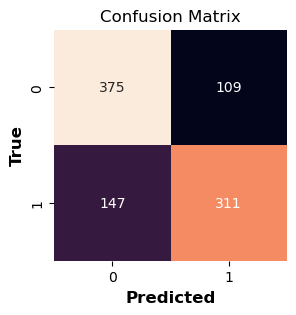

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Model이 얼마나 잘 분류했는지를 보는 과정 중 가장 유명한 것은 위와같이 **혼동 행렬(Confusion Matrix)** 를 보는 것이다. 혼동 행렬은 아래와 같이 나타낸다

<center>

|                     | Predicted positive | Predicted negative |
|:-------------------:|:------------------:|:------------------:|
| **Actual positive** |   True Positive    |   False negative   |
| **Actual negative** |   False positive   |   True Negative    |

</center>


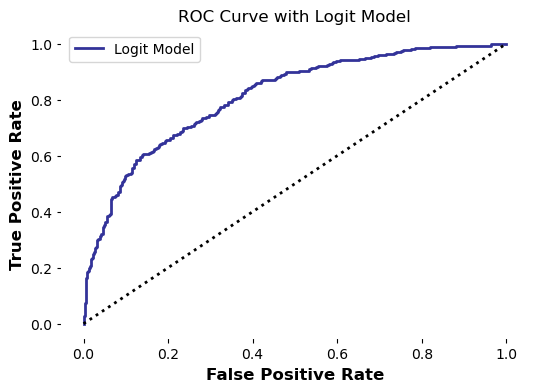

In [96]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Logit Model', color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logit Model')
plt.legend()
plt.show()

False Positive Rate를 조정함으로써, 모형의 성능을 조정할 수 있다.

In [101]:
target_fpr = 0.3
closest_fpr_index = np.argmin(np.abs(fpr - target_fpr))
closest_fpr = fpr[closest_fpr_index]
closest_tpr = tpr[closest_fpr_index]
optimal_threshold = thresholds[closest_fpr_index]

print(f"Target FPR: {target_fpr}")
print(f"Closest FPR: {closest_fpr : .3f}")
print(f"Corresponding TPR: {closest_tpr : .3f}")
print(f"Optimal Threshold: {optimal_threshold : .3f}")

Target FPR: 0.3
Closest FPR:  0.300
Corresponding TPR:  0.745
Optimal Threshold:  0.438


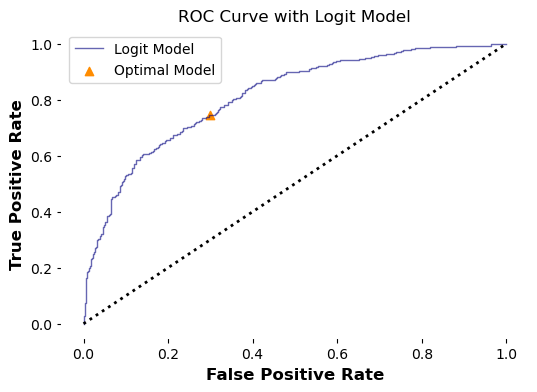

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Logit Model', color = 'navy', alpha = 0.6, lw = 1)
plt.scatter(closest_fpr, closest_tpr, marker = '^', label = 'Optimal Model', color = 'darkorange')
plt.plot([0, 1], [0, 1], 'k:')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logit Model')
plt.legend()
plt.show()